In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir('/Users/a1/Desktop/learning/house_price_5.15')

In [3]:
train_df = pd.read_csv('train.csv', index_col = 0) #这里用第一列来作为索引了
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
a = train_df.index
a

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460],
           dtype='int64', name='Id', length=1460)

In [5]:
test_df = pd.read_csv('test.csv', index_col = 0)
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
b = test_df.index
b

Int64Index([1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
            ...
            2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
           dtype='int64', name='Id', length=1459)

In [7]:
y_train = train_df.pop("SalePrice")
y_train

Id
1       208500
2       181500
3       223500
4       140000
5       250000
6       143000
7       307000
8       200000
9       129900
10      118000
11      129500
12      345000
13      144000
14      279500
15      157000
16      132000
17      149000
18       90000
19      159000
20      139000
21      325300
22      139400
23      230000
24      129900
25      154000
26      256300
27      134800
28      306000
29      207500
30       68500
         ...  
1431    192140
1432    143750
1433     64500
1434    186500
1435    160000
1436    174000
1437    120500
1438    394617
1439    149700
1440    197000
1441    191000
1442    149300
1443    310000
1444    121000
1445    179600
1446    129000
1447    157900
1448    240000
1449    112000
1450     92000
1451    136000
1452    287090
1453    145000
1454     84500
1455    185000
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

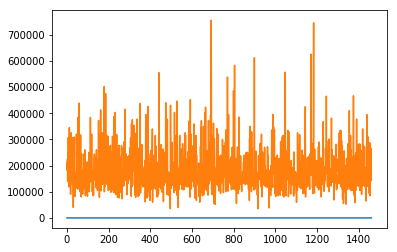

In [8]:
y_train_df = pd.DataFrame({"y_train":y_train, "log1p(y_train)":np.log1p(y_train)})
plt.plot(y_train_df)

([array([209., 419., 285., 294., 197.,  56.,   0.,   0.,   0.,   0.]),
  array([ 61.,   0.,  87.,   0.,   0., 265., 354., 302., 207., 184.])],
 array([   0. ,  132.5,  265. ,  397.5,  530. ,  662.5,  795. ,  927.5,
        1060. , 1192.5, 1325. ]),
 <a list of 2 Lists of Patches objects>)

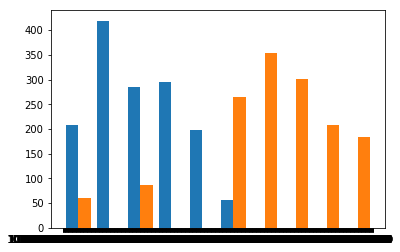

In [9]:
plt.hist(y_train_df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116f6c0f0>,
      dtype=object)

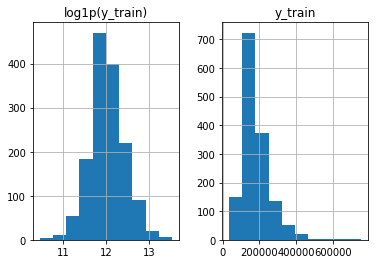

In [10]:
y_train_df.hist() #这种方式最好，还是用log1p的方式处理，用hist直方图展现

In [11]:
y_train = np.log1p(y_train)
y_train

Id
1       12.247699
2       12.109016
3       12.317171
4       11.849405
5       12.429220
6       11.870607
7       12.634606
8       12.206078
9       11.774528
10      11.678448
11      11.771444
12      12.751303
13      11.877576
14      12.540761
15      11.964007
16      11.790565
17      11.911708
18      11.407576
19      11.976666
20      11.842236
21      12.692506
22      11.845110
23      12.345839
24      11.774528
25      11.944714
26      12.454108
27      11.811555
28      12.631344
29      12.242891
30      11.134604
          ...    
1431    12.165985
1432    11.875838
1433    11.074436
1434    12.136192
1435    11.982935
1436    12.066816
1437    11.699413
1438    12.885673
1439    11.916395
1440    12.190964
1441    12.160034
1442    11.913720
1443    12.644331
1444    11.703554
1445    12.098493
1446    11.767575
1447    11.969724
1448    12.388398
1449    11.626263
1450    11.429555
1451    11.820418
1452    12.567555
1453    11.884496
1454    11.344519
1455   

In [12]:
print(train_df.shape)
train_df.head()

(1460, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [13]:
print(test_df.shape)
test_df.head()

(1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [14]:
all_df = pd.concat((train_df, test_df), axis=0)
print(all_df.shape)
all_df.head()

(2919, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [15]:
all_df["MSSubClass"].dtypes

dtype('int64')

In [16]:
all_df["MSSubClass"] = all_df["MSSubClass"].astype(str)
all_df["MSSubClass"].dtypes

dtype('O')

In [17]:
all_df["MSSubClass"].value_counts()

20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [18]:
pd.get_dummies(all_df["MSSubClass"], prefix='MSSubClass')

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [19]:
all_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [20]:
all_dummy_df = pd.get_dummies(all_df)
print(all_dummy_df.shape)
all_dummy_df.head()

(2919, 303)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [21]:
#处理缺失的值,用平均值去填充那些缺失的值
all_dummy_df.isnull().sum().sort_values(ascending = False)

LotFrontage             486
GarageYrBlt             159
MasVnrArea               23
BsmtHalfBath              2
BsmtFullBath              2
BsmtFinSF2                1
GarageCars                1
TotalBsmtSF               1
BsmtUnfSF                 1
GarageArea                1
BsmtFinSF1                1
Condition1_Artery         0
Condition2_Feedr          0
Condition2_Artery         0
Neighborhood_Somerst      0
Neighborhood_StoneBr      0
Neighborhood_Timber       0
Neighborhood_Veenker      0
Condition1_Feedr          0
Condition1_RRAn           0
Condition1_RRNn           0
Condition1_RRNe           0
Condition1_Norm           0
Condition1_PosA           0
Neighborhood_SawyerW      0
Condition1_RRAe           0
Condition1_PosN           0
Neighborhood_OldTown      0
Neighborhood_Sawyer       0
Neighborhood_MeadowV      0
                       ... 
BsmtFinType2_ALQ          0
BsmtFinType2_BLQ          0
BsmtFinType2_GLQ          0
BsmtFinType2_LwQ          0
BsmtFinType2_Rec    

In [22]:
mean_cols = all_dummy_df.mean()
mean_cols

LotFrontage                 69.305795
LotArea                  10168.114080
OverallQual                  6.089072
OverallCond                  5.564577
YearBuilt                 1971.312778
YearRemodAdd              1984.264474
MasVnrArea                 102.201312
BsmtFinSF1                 441.423235
BsmtFinSF2                  49.582248
BsmtUnfSF                  560.772104
TotalBsmtSF               1051.777587
1stFlrSF                  1159.581706
2ndFlrSF                   336.483727
LowQualFinSF                 4.694416
GrLivArea                 1500.759849
BsmtFullBath                 0.429894
BsmtHalfBath                 0.061364
FullBath                     1.568003
HalfBath                     0.380267
BedroomAbvGr                 2.860226
KitchenAbvGr                 1.044536
TotRmsAbvGrd                 6.451524
Fireplaces                   0.597122
GarageYrBlt               1978.113406
GarageCars                   1.766621
GarageArea                 472.874572
WoodDeckSF  

In [23]:
all_dummy_df = all_dummy_df.fillna(mean_cols)

In [24]:
all_dummy_df.isnull().sum().sort_values() #没有缺失的值了

LotFrontage              0
BsmtExposure_Av          0
BsmtCond_TA              0
BsmtCond_Po              0
BsmtCond_Gd              0
BsmtCond_Fa              0
BsmtQual_TA              0
BsmtQual_Gd              0
BsmtQual_Fa              0
BsmtQual_Ex              0
Foundation_Wood          0
Foundation_Stone         0
Foundation_Slab          0
Foundation_PConc         0
Foundation_CBlock        0
Foundation_BrkTil        0
BsmtExposure_Gd          0
ExterCond_TA             0
BsmtExposure_Mn          0
BsmtFinType1_ALQ         0
Heating_Grav             0
Heating_GasW             0
Heating_GasA             0
Heating_Floor            0
BsmtFinType2_Unf         0
BsmtFinType2_Rec         0
BsmtFinType2_LwQ         0
BsmtFinType2_GLQ         0
BsmtFinType2_BLQ         0
BsmtFinType2_ALQ         0
                        ..
Neighborhood_Edwards     0
Neighborhood_Crawfor     0
Neighborhood_CollgCr     0
Neighborhood_ClearCr     0
Neighborhood_BrkSide     0
Neighborhood_BrDale      0
N

In [25]:
numeric_cols = all_df.columns[all_df.dtypes != 'object']
numeric_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [26]:
#漏了loc，定位啊
numeric_cols_means = all_dummy_df.loc[:, numeric_cols].mean()
numeric_cols_std = all_dummy_df.loc[:, numeric_cols].std()
print(numeric_cols_means)
print(numeric_cols_std)

LotFrontage         69.305795
LotArea          10168.114080
OverallQual          6.089072
OverallCond          5.564577
YearBuilt         1971.312778
YearRemodAdd      1984.264474
MasVnrArea         102.201312
BsmtFinSF1         441.423235
BsmtFinSF2          49.582248
BsmtUnfSF          560.772104
TotalBsmtSF       1051.777587
1stFlrSF          1159.581706
2ndFlrSF           336.483727
LowQualFinSF         4.694416
GrLivArea         1500.759849
BsmtFullBath         0.429894
BsmtHalfBath         0.061364
FullBath             1.568003
HalfBath             0.380267
BedroomAbvGr         2.860226
KitchenAbvGr         1.044536
TotRmsAbvGrd         6.451524
Fireplaces           0.597122
GarageYrBlt       1978.113406
GarageCars           1.766621
GarageArea         472.874572
WoodDeckSF          93.709832
OpenPorchSF         47.486811
EnclosedPorch       23.098321
3SsnPorch            2.602261
ScreenPorch         16.062350
PoolArea             2.251799
MiscVal             50.825968
MoSold    

In [27]:
all_dummy_df.loc[:, numeric_cols] = (all_dummy_df.loc[:, numeric_cols] - numeric_cols_means)/numeric_cols_std
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.202033,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.525112,0.580807,-0.29308,-0.934702,...,0,0,0,1,0,0,0,0,1,0
2,0.501785,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.572152,1.177910,-0.29308,-0.629788,...,0,0,0,1,0,0,0,0,1,0
3,-0.061269,0.137173,0.646073,-0.507197,0.980053,0.848819,0.334770,0.097856,-0.29308,-0.288467,...,0,0,0,1,0,0,0,0,1,0
4,-0.436639,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.572152,-0.494856,-0.29308,-0.047266,...,0,0,0,1,1,0,0,0,0,0
5,0.689469,0.518814,1.355319,-0.507197,0.947040,0.753100,1.387248,0.468851,-0.29308,-0.161040,...,0,0,0,1,0,0,0,0,1,0


In [28]:
all_dummy_df.shape

(2919, 303)

#### 建造模型

In [29]:
dummy_train_df = all_dummy_df.loc[a] #取行出来，刚才是取列出来
dummy_test_df = all_dummy_df.loc[b]

In [30]:
print(dummy_train_df.shape)
print(dummy_test_df.shape)

(1460, 303)
(1459, 303)


In [31]:
train_df.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460],
           dtype='int64', name='Id', length=1460)

In [32]:
test_df.index

Int64Index([1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
            ...
            2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
           dtype='int64', name='Id', length=1459)

In [33]:
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]

In [34]:
dummy_train_df.shape, dummy_test_df.shape

((1460, 303), (1459, 303))

In [35]:
test_df.index.values

array([1461, 1462, 1463, ..., 2917, 2918, 2919])

In [36]:
X_train = dummy_train_df.values
X_test = dummy_test_df.values

In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [38]:
alphas = np.logspace(-3, 2, 80)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv = 10, scoring= 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

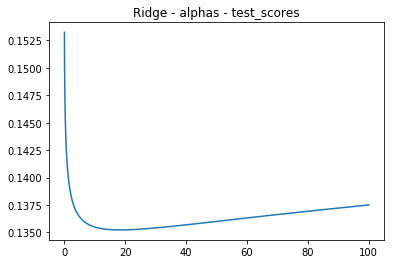

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(alphas, test_scores)
plt.title("Ridge - alphas - test_scores")
min_indx = np.argmin(test_scores)


In [40]:
min(test_scores)

0.13522704901216648

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116607630>]],
      dtype=object)

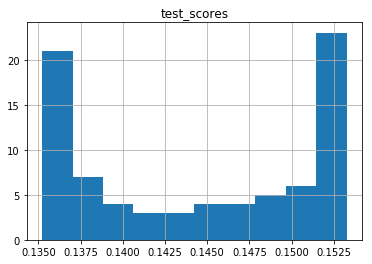

In [41]:
test_scores_df = pd.DataFrame({"test_scores":test_scores})
test_scores_df.hist()

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
max_features = [.1, .3, .5, .7, .9, .99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

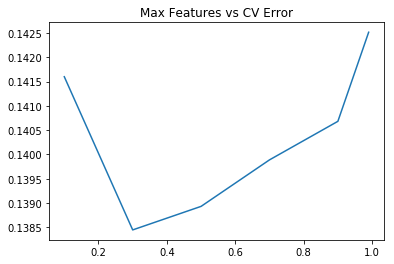

In [44]:
plt.plot(max_features, test_scores)
plt.title("Max Features vs CV Error");


In [45]:
min(test_scores)

0.13844516215624386

In [46]:
from sklearn.ensemble import BaggingRegressor
random_model = RandomForestRegressor(0.3)
ridge = Ridge(15)


In [47]:
params = [1, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators=param, base_estimator=ridge)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0,0.5,'test_scores')

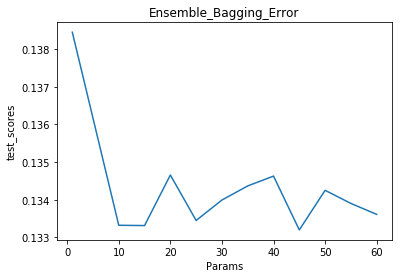

In [48]:
plt.plot(params, test_scores)
plt.title("Ensemble_Bagging_Error")
plt.xlabel("Params")
plt.ylabel("test_scores")

In [49]:
min(test_scores)

0.13319896238484388

In [50]:
from sklearn.ensemble import AdaBoostRegressor

In [55]:
params = [10, 15, 20, 25, 30, 35, 40, 50, 60, 70,80,90]
test_scores = []
for param in params:
    clf = AdaBoostRegressor(n_estimators = param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv = 10, scoring= 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0.5,1,'Adaboosting_error')

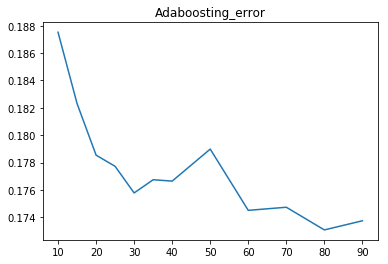

In [56]:
plt.plot(params, test_scores)
plt.title("Adaboosting_error")

In [57]:
min(test_scores) #这个方法不行啊

0.17307996831668052

In [59]:
#转用xgboosting
from xgboost import XGBRegressor

In [60]:
params = [1, 2, 3, 4, 5, 6, 7, 8, 9]
test_scores = []
for param in params:
    clf = XGBRegressor(max_depth = param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))


In [61]:
min(test_scores)

0.12752967909259855

Text(0.5,1,'XGBoosting_error')

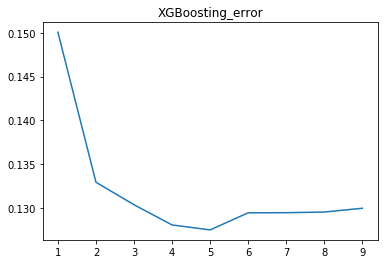

In [62]:
plt.plot(params, test_scores)
plt.title("XGBoosting_error")

In [63]:
xgboost = XGBRegressor(5)

In [73]:
ridge = Ridge(alpha = 13)

In [65]:
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [74]:
ridge.fit(X_train, y_train)

Ridge(alpha=13, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [66]:
y_xgboost = np.expm1(xgboost.predict(X_test))

In [75]:
y_ridge = np.expm1(ridge.predict(X_test))

In [76]:
y_final = (y_xgboost + y_ridge)/2

In [67]:
submission_df = pd.DataFrame(data={'Id': test_df.index, 'SalePrice':y_xgboost})

In [77]:
submission_df2 = pd.DataFrame(data = {'Id': test_df.index, 'SalePrice':y_final})

In [68]:
submission_df.head()

,Id,SalePrice
0,1461,122858.617188
1,1462,162398.265625
2,1463,189725.781250
3,1464,189369.859375
4,1465,189783.156250


In [78]:
submission_df2.head()

,Id,SalePrice
0,1461,118308.296668
1,1462,155888.192478
2,1463,180205.222018
3,1464,192054.358188
4,1465,193844.601630


In [72]:
#注意导出来的格式
submission_df.to_csv('/Users/a1/Desktop/learning/house_price_5.15/submission.csv', index=False)

In [79]:
submission_df2.to_csv('/Users/a1/Desktop/learning/house_price_5.15/submission2.csv', index=False)

In [80]:
#转用xgboosting 调整参数cv=15
from xgboost import XGBRegressor
params = [1, 2, 3, 4, 5, 6, 7, 8, 9]
test_scores = []
for param in params:
    clf = XGBRegressor(max_depth = param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

0.12752967909259855


Text(0.5,1,'XGBoosting_error_cv=15')

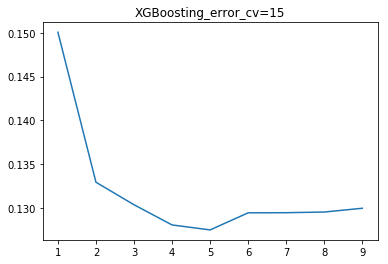

In [81]:
print(min(test_scores))
plt.plot(params, test_scores)
plt.title("XGBoosting_error_cv=15")